In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df_train.shape

(404290, 6)

In [6]:
df_train['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

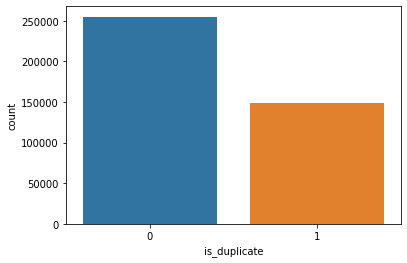

In [7]:
sns.countplot(x='is_duplicate', data=df_train)

In [8]:
final_list = list(set(df_train['qid1']) | set(df_train['qid1']))

In [9]:
print('Total number of unique questions : ', len(final_list))

Total number of unique questions :  290654


In [10]:
 df_train['question1'].isna().sum(), df_train['question2'].isna().sum()

(1, 2)

In [11]:
df_train.shape[0] - df_train.dropna(how='any').shape[0]

3

In [12]:
df_train = df_train.dropna(how='any')

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /home/prerit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df_train['question1'] = df_train['question1'].str.lower()
df_train['question2'] = df_train['question2'].str.lower()

In [15]:
df_train[:5]['question1']

0    what is the step by step guide to invest in sh...
1    what is the story of kohinoor (koh-i-noor) dia...
2    how can i increase the speed of my internet co...
3    why am i mentally very lonely? how can i solve...
4    which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object

In [16]:
import string
exclude = set(string.punctuation)

In [17]:
df_train['question1'] = df_train['question1'].apply(lambda x: ''.join(item for item in x if item not in exclude))
df_train['question2'] = df_train['question2'].apply(lambda x: ''.join(item for item in x if item not in exclude))

In [18]:
df_train[:5]['question1']

0    what is the step by step guide to invest in sh...
1       what is the story of kohinoor kohinoor diamond
2    how can i increase the speed of my internet co...
3     why am i mentally very lonely how can i solve it
4    which one dissolve in water quikly sugar salt ...
Name: question1, dtype: object

In [19]:
df_train['question1'] = df_train['question1'].str.split()
df_train['question2'] = df_train['question2'].str.split()

In [20]:
df_train['question1'] = df_train['question1'].apply(lambda x: [item for item in x if item not in stop])
df_train['question2'] = df_train['question2'].apply(lambda x: [item for item in x if item not in stop])

In [21]:
df_train[:5]['question1']

0    [step, step, guide, invest, share, market, india]
1                 [story, kohinoor, kohinoor, diamond]
2    [increase, speed, internet, connection, using,...
3                            [mentally, lonely, solve]
4    [one, dissolve, water, quikly, sugar, salt, me...
Name: question1, dtype: object

In [22]:
df_train['q1_s'] = df_train['question1'].apply(lambda x: [stemmer.stem(y) for y in x])
df_train['q2_s'] = df_train['question2'].apply(lambda x: [stemmer.stem(y) for y in x])

In [23]:
df_train[:5]['q1_s']

0     [step, step, guid, invest, share, market, india]
1                 [stori, kohinoor, kohinoor, diamond]
2        [increas, speed, internet, connect, use, vpn]
3                                 [mental, lone, solv]
4    [one, dissolv, water, quik, sugar, salt, metha...
Name: q1_s, dtype: object

In [24]:
df_train[:5]['question1']

0    [step, step, guide, invest, share, market, india]
1                 [story, kohinoor, kohinoor, diamond]
2    [increase, speed, internet, connection, using,...
3                            [mentally, lonely, solve]
4    [one, dissolve, water, quikly, sugar, salt, me...
Name: question1, dtype: object

In [25]:
from gensim.models import Word2Vec

In [26]:
sentences = list(df_train['q1_s']) + list(df_train['q2_s'])

In [27]:
embed_size = 200

In [28]:
model = Word2Vec(sentences, size=embed_size, window=3, min_count=1, workers=4)

In [29]:
model.wv.most_similar(positive=['water'])

[('salt', 0.6913275122642517),
 ('treaty1960', 0.6338238716125488),
 ('oxygen', 0.6298987865447998),
 ('gallon', 0.6194853782653809),
 ('dechlorin', 0.6175599098205566),
 ('nitrogen', 0.6130704879760742),
 ('bottl', 0.6116565465927124),
 ('purifi', 0.6099673509597778),
 ('boil', 0.6032534837722778),
 ('fluorid', 0.6028727293014526)]

In [45]:
df_train['q1_s'].values

array([list(['step', 'step', 'guid', 'invest', 'share', 'market', 'india']),
       list(['stori', 'kohinoor', 'kohinoor', 'diamond']),
       list(['increas', 'speed', 'internet', 'connect', 'use', 'vpn']),
       ..., list(['one', 'coin']),
       list(['approx', 'annual', 'cost', 'live', 'studi', 'uic', 'chicago', 'indian', 'student']),
       list(['like', 'sex', 'cousin'])], dtype=object)

In [46]:
vecs = []
for i in list(df_train['q1_s'].values):
    vec = np.zeros(embed_size,)
    for x in i:
        vec = vec + model[x]
    vec = vec/len(i)
    vecs.append(vec)

/home/prerit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/prerit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [51]:
vecs

array([[-0.11847342, -0.23277796,  0.74413716, ..., -0.38728223,
         0.15855509,  0.44137479],
       [ 0.19851578,  0.20095828, -0.00494627, ...,  0.45982901,
        -0.34180589,  0.0080701 ],
       [-0.26043542, -0.32873926, -0.22047575, ..., -0.27341046,
         0.0356286 ,  0.04602848],
       ...,
       [-0.50102203,  0.44166718, -0.23727839, ...,  0.0430101 ,
         0.28749011,  0.68251935],
       [ 0.00273997, -0.07665708,  0.16335477, ..., -0.15704367,
         0.21588602,  0.19194649],
       [-0.04445675,  0.42486517,  0.32061607, ...,  0.3933839 ,
        -0.95200999, -0.6505134 ]])

In [52]:
vecs = np.array(vecs)

In [53]:
vecs.shape

(404287, 200)

In [55]:
vecs[np.isnan(vecs)] = 0

In [1]:
# X = model[model.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
# pyplot.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
#     pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
# pyplot.show()

In [34]:
vecs2 = []
for i in list(df_train['q2_s']):
    vec = np.zeros(embed_size,)
    for x in i:
        vec = vec + model[x]
    vec = vec/len(i)
    vecs2.append(vec)

/home/prerit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/prerit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
vecs2 = np.array(vecs2)

In [36]:
vecs2.shape

(404287, 200)

In [56]:
vecs2[np.isnan(vecs2)] = 0

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

In [62]:
c = []
for i in range(vecs.shape[0]):
    result = 1 - spatial.distance.cosine(vecs[i], vecs2[i])
    c.append(result)

/home/prerit/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [80]:
preds = [1 if x > 0.95 else 0 for x in c]

In [85]:
preds.count(0)

322549

In [81]:
true = list(df_train['is_duplicate'])

In [82]:
len(preds), len(true)

(404287, 404287)

In [83]:
len([1 for i, j in zip(preds, true) if i == j])/len(preds)

0.6410742863361919